In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
insurance = pd.read_csv('insurance.csv')

In [5]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
cleaned_ins = insurance.copy()

In [11]:
cleaned_ins.drop(['region'], axis=1, inplace=True)

In [12]:
cleaned_ins

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [15]:
cleaned_ins = pd.get_dummies(cleaned_ins)

In [16]:
cleaned_ins

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0
2,28,33.000,3,4449.46200,0,1,1,0
3,33,22.705,0,21984.47061,0,1,1,0
4,32,28.880,0,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0
1334,18,31.920,0,2205.98080,1,0,1,0
1335,18,36.850,0,1629.83350,1,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0


In [17]:
new_ins = pd.get_dummies(insurance)
new_ins

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [29]:
X = new_ins.drop(['charges'], axis=1)

In [25]:
y = new_ins['charges']

In [27]:
y = y.to_frame(name='charges')

In [31]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [32]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [34]:
X_train = X[:1070]
X_test = X[1070:]
y_train = y[:1070]
y_test = y[1070:]

In [35]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1065,42,25.300,1,1,0,1,0,0,0,0,1
1066,48,37.290,2,0,1,1,0,0,0,1,0
1067,39,42.655,0,0,1,1,0,1,0,0,0
1068,63,21.660,1,0,1,1,0,0,1,0,0


In [44]:
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,37,37.070,1,0,1,0,1,0,0,1,0
1,63,31.445,0,0,1,1,0,1,0,0,0
2,21,31.255,0,0,1,1,0,0,1,0,0
3,54,28.880,2,1,0,1,0,1,0,0,0
4,60,18.335,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
263,50,30.970,3,0,1,1,0,0,1,0,0
264,18,31.920,0,1,0,1,0,1,0,0,0
265,18,36.850,0,1,0,1,0,0,0,1,0
266,21,25.800,0,1,0,1,0,0,0,0,1


In [43]:
# reset index of X_test dataframe
X_test.index = np.arange(0, len(X_test))

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [47]:
y_train

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


In [48]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8718.7510 - mae: 8718.7510
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7850.6851 - mae: 7850.6851
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7617.6426 - mae: 7617.6426
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7710.8047 - mae: 7710.8047
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7674.5527 - mae: 7674.5527
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7574.7969 - mae: 7574.7969
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7571.2524 - mae: 7571.2524
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7809.0825 - mae: 7809.0825
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7469.2720 - mae: 7469.2720
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7586.7905 - mae: 7586.7905

34/34 [==============================] - 0s 2ms/step - loss: 7202.7744 - mae: 7202.7744
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 7389.8169 - mae: 7389.8169
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 7400.2827 - mae: 7400.2827
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 7414.0166 - mae: 7414.0166
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 7416.1660 - mae: 7416.1660
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 7303.6060 - mae: 7303.6060
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 7378.0488 - mae: 7378.0488
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 7215.5996 - mae: 7215.5996
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 7357.5596 - mae: 7357.5596
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 7221.9346 - mae: 7221.9346
Epo

In [49]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7267.7598 - mae: 7267.7598


[7267.759765625, 7267.759765625]

In [ ]:
# Check the result
y_pred = insurance_model.predict(X_test)

In [ ]:
# First model is not perfoming very well sadly.

In [ ]:
# Next model

In [60]:
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         metrics=["mae"])

history_2 = insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13288.5908 - mae: 13288.5908
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13134.4912 - mae: 13134.4912
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12807.7695 - mae: 12807.7695
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12163.3135 - mae: 12163.3135
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11069.1309 - mae: 11069.1309
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9627.4961 - mae: 9627.4961
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8261.7607 - mae: 8261.7607
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7551.7036 - mae: 7551.7036
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7423.3491 - mae: 7423.3491
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7402.8838 - mae:

34/34 [==============================] - 0s 2ms/step - loss: 5872.1182 - mae: 5872.1182
Epoch 83/100
34/34 [==============================] - 0s 3ms/step - loss: 5846.5342 - mae: 5846.5342
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 5813.6729 - mae: 5813.6729
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 5790.4873 - mae: 5790.4873
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 5758.5776 - mae: 5758.5776
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 5725.6523 - mae: 5725.6523
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 5694.5205 - mae: 5694.5205
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 5657.6675 - mae: 5657.6675
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 5620.2563 - mae: 5620.2563
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 5587.0693 - mae: 5587.0693
Epo

In [59]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5124.3687 - mae: 5124.3687


[5124.36865234375, 5124.36865234375]

In [61]:
# model 3
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history_3 = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13309.6562 - mae: 13309.6562
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13160.5869 - mae: 13160.5869
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12842.8145 - mae: 12842.8145
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12206.8223 - mae: 12206.8223
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11118.2412 - mae: 11118.2412
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9670.5938 - mae: 9670.5938
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8285.7539 - mae: 8285.7539
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7558.5083 - mae: 7558.5083
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7423.1650 - mae: 7423.1650
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7402.4863 - mae:

34/34 [==============================] - 0s 2ms/step - loss: 5846.9712 - mae: 5846.9712
Epoch 83/200
34/34 [==============================] - 0s 3ms/step - loss: 5819.7808 - mae: 5819.7808
Epoch 84/200
34/34 [==============================] - 0s 2ms/step - loss: 5786.8599 - mae: 5786.8599
Epoch 85/200
34/34 [==============================] - 0s 2ms/step - loss: 5761.8037 - mae: 5761.8037
Epoch 86/200
34/34 [==============================] - 0s 2ms/step - loss: 5727.7148 - mae: 5727.7148
Epoch 87/200
34/34 [==============================] - 0s 3ms/step - loss: 5692.4932 - mae: 5692.4932
Epoch 88/200
34/34 [==============================] - 0s 2ms/step - loss: 5659.3765 - mae: 5659.3765
Epoch 89/200
34/34 [==============================] - 0s 2ms/step - loss: 5621.7241 - mae: 5621.7241
Epoch 90/200
34/34 [==============================] - 0s 2ms/step - loss: 5582.2280 - mae: 5582.2280
Epoch 91/200
34/34 [==============================] - 0s 2ms/step - loss: 5547.1729 - mae: 5547.1729
Epo

34/34 [==============================] - 0s 2ms/step - loss: 3728.7627 - mae: 3728.7627
Epoch 163/200
34/34 [==============================] - 0s 2ms/step - loss: 3726.1111 - mae: 3726.1111
Epoch 164/200
34/34 [==============================] - 0s 2ms/step - loss: 3730.9197 - mae: 3730.9197
Epoch 165/200
34/34 [==============================] - 0s 2ms/step - loss: 3721.6169 - mae: 3721.6169
Epoch 166/200
34/34 [==============================] - 0s 2ms/step - loss: 3726.1426 - mae: 3726.1426
Epoch 167/200
34/34 [==============================] - 0s 2ms/step - loss: 3724.6145 - mae: 3724.6145
Epoch 168/200
34/34 [==============================] - 0s 2ms/step - loss: 3719.2080 - mae: 3719.2080
Epoch 169/200
34/34 [==============================] - 0s 2ms/step - loss: 3718.5659 - mae: 3718.5659
Epoch 170/200
34/34 [==============================] - 0s 2ms/step - loss: 3712.2529 - mae: 3712.2529
Epoch 171/200
34/34 [==============================] - 0s 2ms/step - loss: 3711.7056 - mae: 3711

Text(0.5, 0, 'epochs')

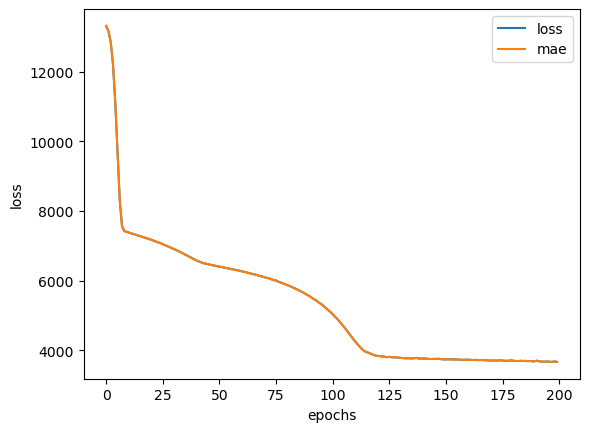

In [62]:
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [64]:
y.mean(), y.median()

(charges    13270.422265
 dtype: float64,
 charges    9382.033
 dtype: float64)

In [65]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3499.0002 - mae: 3499.0002


[3499.000244140625, 3499.000244140625]

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer((MinMaxScaler(), ["age", "bmi", "children"]),
                            (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker","region"])
)